![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [2]:
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Instalando componentes necessários para habilitar a conexão com banco de dados SQLite
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [4]:
#Importando os dados
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produtos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [5]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produtos)
vendedores = pd.read_csv(url_vendedores)

In [6]:
#Criação do banco de dados local
engine = create_engine('sqlite:///:memory:')

In [7]:
produtos.to_sql('produtos', engine, index=False)
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [8]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [9]:
query = 'SELECT CONDICAO FROM PRODUTOS'

In [10]:
#Realizando a primeira consulta
query = 'SELECT CONDICAO FROM PRODUTOS'

with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
pd.DataFrame(dados, columns=consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [11]:
#Criando funcion para facilitar a consulta
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados, columns=consulta.keys())

In [12]:
#Utilizando a função para realizar uma consulta e atribuir a um DataFrame
df_produtos = sql_df('''
                     SELECT condicao, COUNT(*) AS Quantidade
                     FROM produtos 
                     GROUP BY condicao;
                     ''')

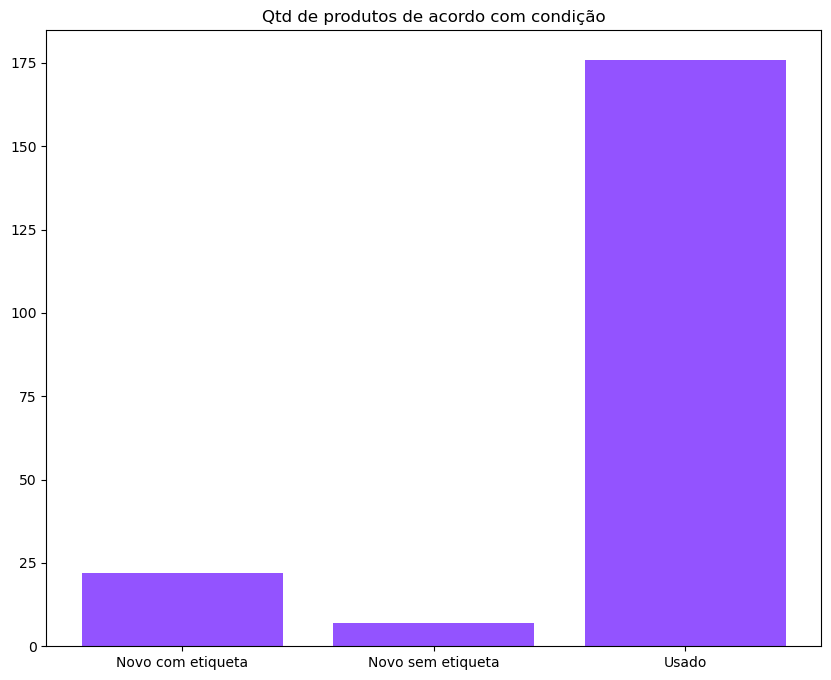

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
ax = plt.bar(df_produtos['Condicao'], df_produtos['Quantidade'], color='#9353ff')
plt.title('Qtd de produtos de acordo com condição')
plt.show()

plt.savefig('grafico_produtos.png', dpi=300, bbox_inches='tight')

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [14]:
sql_df('SELECT * FROM produtos')

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [15]:
sql_df('SELECT * FROM itens_pedidos')

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [16]:
sql_df('''SELECT itens_pedidos.produto_id, produtos.produto, SUM(itens_pedidos.quantidade) AS quantidade
            FROM itens_pedidos, produtos
            WHERE itens_pedidos.produto_id = produtos.produto_id
            GROUP BY produtos.produto''')

,produto_id,produto,quantidade
0,12751,Bata Pink Decote,459
1,55051,Bermuda Acetinada Preta,363
2,54794,Bermuda Jeans Lavagem,395
3,86845,Bermuda Listras Bolsos,402
4,13906,Blazer Alfaiataria Grafite,433
...,...,...,...
196,56571,Vestido Seda Floral,428
197,64127,Vestido Textura Branco,470
198,81822,Vestido Verde Estampa,423
199,83866,Vestido Xadrez Pb,384


In [ ]:
df_prod_qtd = sql_df('''
                    SELECT itens_pedidos.produto_id, produtos.produto, SUM(itens_pedidos.quantidade) AS quantidade
                    FROM itens_pedidos, produtos
                    WHERE itens_pedidos.produto_id = produtos.produto_id
                    GROUP BY produtos.produto
                    ORDER BY quantidade ASC
                    ''')

df_prod_qtd

,produto_id,produto,quantidade
0,47682,Vestido Malha Estampa,318
1,84743,Blusa Listrada Malha,322
2,88368,Blusa Malha Azul,325
3,32986,Blusa Babados Off-white,337
4,2706,Blusa Cinza,341
...,...,...,...
196,32126,Saia Midi Cinto,549
197,11218,Calca Alfaiataria Preta,750
198,72667,Saia Pregas Preta,751
199,98640,Calca Jeans Costuras,755


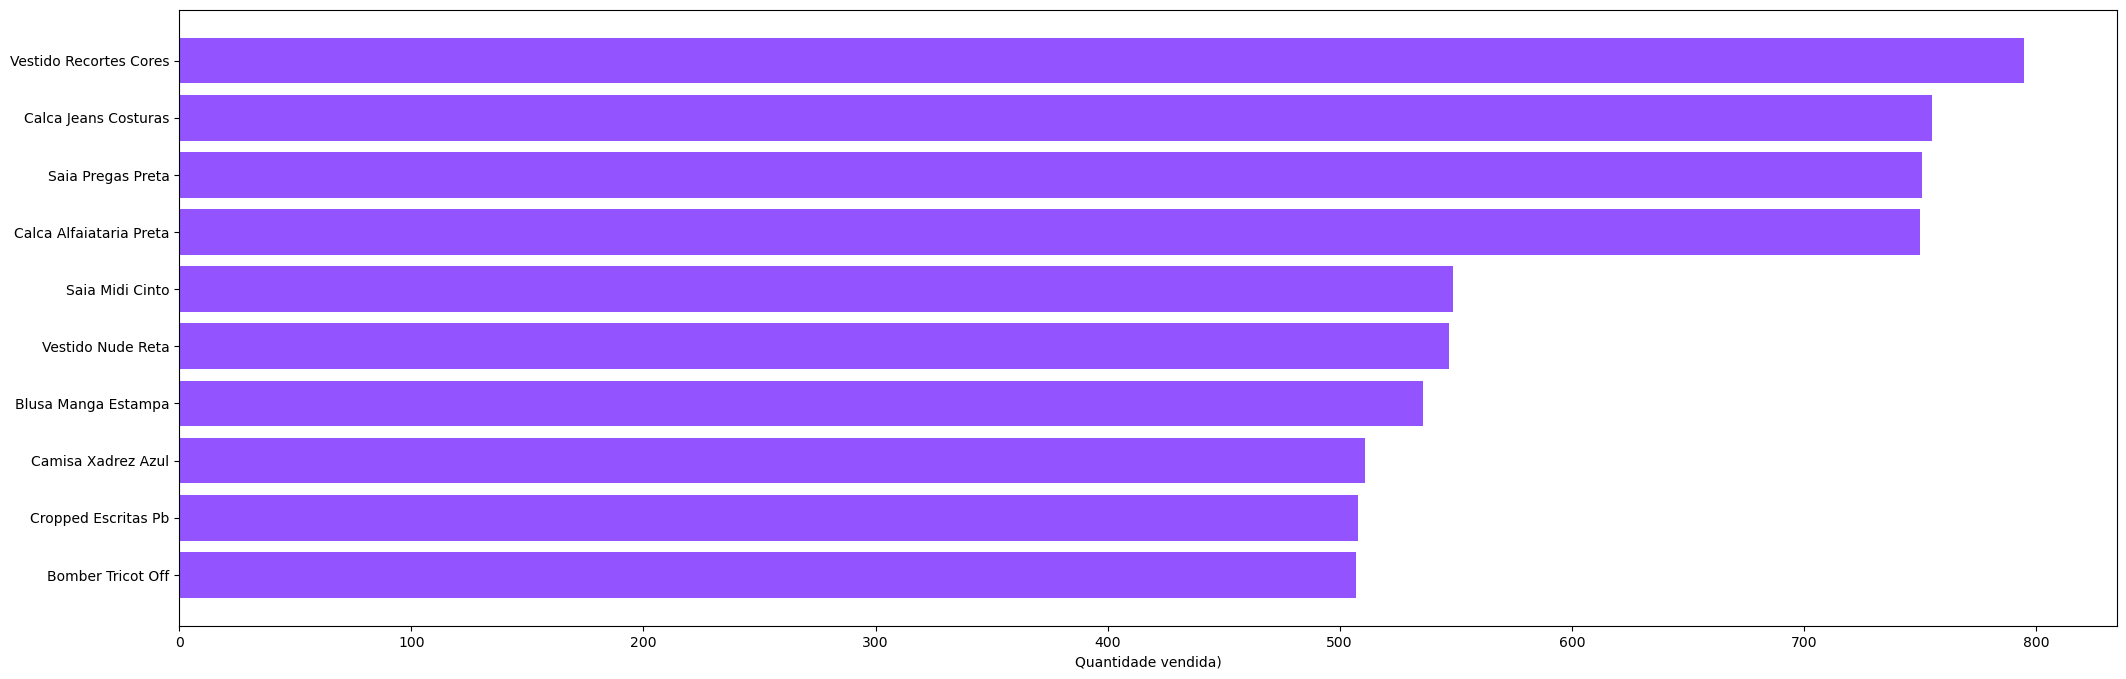

In [18]:
plt.figure(figsize=(25,8))
plt.barh(df_prod_qtd['produto'][-10:], df_prod_qtd['quantidade'][-10:], color='#9353FF')
plt.xlabel('Quantidade vendida)')
plt.show()

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [19]:
sql_df('SELECT * FROM pedidos').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [20]:
sql_df('SELECT * FROM pedidos').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [21]:
sql_df('''
       SELECT vendedores.nome_vendedor, AVG(pedidos.total) AS 'Valor médio por vendas'
       FROM pedidos, vendedores
       WHERE STRFTIME('%Y', data_compra) = '2020' AND vendedores.vendedor_id = pedidos.vendedor_id
       GROUP BY vendedores.nome_vendedor
       ORDER BY AVG(pedidos.total) DESC;
       ''')

,nome_vendedor,Valor médio por vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [22]:
sql_df('''
       SELECT estado, COUNT(*) AS Pedidos
       FROM itens_pedidos
       GROUP BY estado
       ORDER BY pedidos DESC;
       ''')

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [ ]:
#Consulta utilizando JOIN
sql_df('''
       SELECT vendedores.nome_vendedor, COUNT(*) AS Quantidade_vendas 
       FROM pedidos
       JOIN vendedores ON vendedores.vendedor_id = pedidos.vendedor_id
       JOIN itens_pedidos ON itens_pedidos.pedido_id = pedidos.pedido_id
       WHERE itens_pedidos.estado = 'BR-SP'
       GROUP BY vendedores.nome_vendedor
       ORDER BY Quantidade_vendas DESC;
       ''')

,nome_vendedor,Quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157
